In [1]:
%%html
<link rel="stylesheet" type="text/css" href="rise.css" />

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [8, 6]

# [PyTorch](https://pytorch.org)
```
pip install torch
```

In [3]:
import torch
from torch import nn

To construct your neural network in PyTorch you create a class that inherits from `torch.nn.Module`.

In [ ]:
class MyAwesomeNeuralNetwork(nn.Module):
    ...

In your network's initialization method, you first must initialize `nn.Module`.

In [ ]:
class MyAwesomeNeuralNetwork(nn.Module):

    def __init__(self):
        nn.Module.__init__(self)

Next, you define the various components of your network.

In [ ]:
class MyAwesomeNeuralNetwork(nn.Module):
    
    def __init__(self):
        nn.Module.__init__(self)

        # 10 inputs -> 5 neurons in hidden layer
        self.hidden_layer = nn.Linear(10, 5)
        
        # 5 neurons in hidden layer -> 1 neuron in output layer
        self.output_layer = nn.Linear(5, 1)

Finally, you must define the forward pass method which takes an input (e.g., `x10`), passes it through your network components, and returns the network's output (e.g., `x1`).

In [ ]:
class MyAwesomeNeuralNetwork(nn.Module):
    
    def __init__(self):
        nn.Module.__init__(self)

        # 10 inputs -> 5 neurons in hidden layer
        self.hidden_layer = nn.Linear(10, 5)
        
        # 5 neurons in hidden layer -> 1 neuron in output layer
        self.output_layer = nn.Linear(5, 1)

    def forward(self, x10):
        # x10 MUST be an array of length 10

        # hidden layer linear transform
        x5 = self.hidden_layer(x10)
        
        # activation function for 5 outputs from hidden layer
        relu = nn.ReLU()
        x5 = relu(x5)

        # output layer linear transform
        x1 = self.output_layer(x5)
        
        # return final output
        return x1

The same code without comments...

In [ ]:
class MyAwesomeNeuralNetwork(nn.Module):
    
    def __init__(self):
        nn.Module.__init__(self)

        self.hidden_layer = nn.Linear(10, 5)
        self.output_layer = nn.Linear(5, 1)

    def forward(self, x10):
        x5 = torch.relu(self.hidden_layer(x10))
        x1 = self.output_layer(x5)
        return x1

An easier way to define sequential layers in your network...

In [ ]:
class MyAwesomeNeuralNetwork(nn.Module):
    
    def __init__(self):
        nn.Module.__init__(self)

        self.main = nn.Sequential(
            nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 1)
        )

    def forward(self, x10):
        x1 = self.main(x10)
        return x1

Diabetes score as a function of 10 other measures in human patients

In [4]:
import pandas as pd

# Measures of various features and diabetes disease progression for 442 patients.
# Available at https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt
dis = pd.read_csv('data/diabetes.csv')
dis

,AGE,SEX,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,DIS
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


Extract feature and target variables from the dataframe.

In [5]:
X = dis.loc[:,'AGE':'GLU']
y = dis['DIS']

X.shape, y.shape

((442, 10), (442,))

Split the dataset into training and testing sets.

You'll train your models on the training set and evaluate their error on the testing set.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.4, random_state=3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((265, 10), (177, 10), (265,), (177,))

Standardize the data.

In [7]:
means = X_train.mean()
stds = X_train.std()

X_train = (X_train - means) / stds
X_test = (X_test - means) / stds

X_train.mean(), X_train.var()

(AGE   -2.010970e-17
 SEX    1.340647e-16
 BMI   -8.043880e-17
 BP     9.552108e-16
 TC     2.681293e-16
 LDL    1.943938e-16
 HDL    2.815358e-16
 TCH   -8.580139e-16
 LTG    1.943938e-16
 GLU   -5.195006e-17
 dtype: float64,
 AGE    1.0
 SEX    1.0
 BMI    1.0
 BP     1.0
 TC     1.0
 LDL    1.0
 HDL    1.0
 TCH    1.0
 LTG    1.0
 GLU    1.0
 dtype: float64)

Get features for first patient in test set.

In [8]:
patient = X_test.iloc[0,:]
patient

AGE   -0.532290
SEX    1.097166
BMI   -0.327719
BP    -0.609865
TC     0.162966
LDL    0.063730
HDL    0.886617
TCH   -0.779989
LTG   -0.461617
GLU    0.228827
Name: 229, dtype: float64

To convert back from standardized to original units.

In [9]:
patient * stds + means

AGE     41.000
SEX      2.000
BMI     24.900
BP      86.000
TC     192.000
LDL    115.000
HDL     61.000
TCH      3.000
LTG      4.382
GLU     94.000
dtype: float64

PyTorch needs data to be converted into a PyTorch Tensor.

*Tensors are essentially the same thing as NumPy N-dimensional arrays.*

The reason for a new `tensor` class rather than simply using NumPy `ndarray` is to include special optimization for several manipulations important for neural networks including performing operations on the GPU in addition to the CPU and calculating gradients of the loss function.

*PyTorch tensors are easily created from NumPy arrays.*

In [10]:
patient_tensor = torch.tensor(patient.to_numpy())
patient_tensor

tensor([-0.5323,  1.0972, -0.3277, -0.6099,  0.1630,  0.0637,  0.8866, -0.7800,
        -0.4616,  0.2288], dtype=torch.float64)

PyTorch tensors behave much the same way as NumPy arrays.

In [11]:
patient_tensor.shape, patient_tensor.dtype

(torch.Size([10]), torch.float64)

In [12]:
patient_tensor[:3]

tensor([-0.5323,  1.0972, -0.3277], dtype=torch.float64)

Let's take a look at how some of our model components convert inputs into outputs.

In [13]:
linear = nn.Linear(10, 5)

output = linear(patient_tensor)
output

RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float

By default (you can change this if you want), PyTorch networks use 32-bit floating point precision.

This clashes with NumPy's default 64-bit floating point precision.

In [14]:
torch.float

torch.float32

In [15]:
patient_tensor = torch.tensor(patient.to_numpy())
patient_tensor.dtype

torch.float64

It is simple to convert your inputs into 32-bit tensors.

In [16]:
patient_tensor = torch.tensor(patient.to_numpy(), dtype=torch.float)
patient_tensor.dtype

torch.float32

In [17]:
patient_tensor = torch.tensor(patient.to_numpy()).float()
patient_tensor.dtype

torch.float32

Now you can feed the patient input to, for example, a PyTorch linear transform.

In [18]:
linear = nn.Linear(10, 5)

output = linear(patient_tensor)
output

tensor([ 0.3316, -0.0563,  0.4575, -0.1567,  0.3204], grad_fn=<ViewBackward0>)

You can inspect all of the parameters of the linear transform.

In [19]:
linear.weight.shape, linear.bias.shape

(torch.Size([5, 10]), torch.Size([5]))

In [20]:
linear.weight, linear.bias

(Parameter containing:
 tensor([[ 0.1774,  0.0652, -0.0168, -0.0198,  0.0744, -0.2864, -0.0282, -0.1137,
          -0.1494, -0.0280],
         [ 0.0273,  0.1416, -0.2818,  0.1541, -0.2106,  0.0469, -0.2926,  0.1986,
          -0.2431, -0.2461],
         [-0.0344,  0.1879, -0.2084, -0.0213,  0.0270, -0.1636,  0.2550, -0.0067,
          -0.2387,  0.1447],
         [ 0.1250,  0.0603, -0.2165,  0.1307, -0.1733,  0.1083, -0.0103, -0.1416,
           0.0718,  0.1682],
         [-0.2144,  0.1153,  0.2053, -0.1703, -0.0816,  0.2044, -0.1959,  0.2142,
          -0.1575,  0.2259]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2169,  0.1942, -0.2169, -0.2328,  0.2598], requires_grad=True))

Let's pass this output to the ReLU activation function.

In [21]:
output

tensor([ 0.3316, -0.0563,  0.4575, -0.1567,  0.3204], grad_fn=<ViewBackward0>)

In [22]:
activation = nn.ReLU()
activation(output)

tensor([0.3316, 0.0000, 0.4575, 0.0000, 0.3204], grad_fn=<ReluBackward0>)

Let's return to your fully defined neural network.

In [23]:
class MyAwesomeNeuralNetwork(nn.Module):
    
    def __init__(self):
        nn.Module.__init__(self)

        self.sequential_layers = nn.Sequential(
            nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 1)
        )

    def forward(self, x10):
        x1 = self.sequential_layers(x10)
        return x1

First, you'll need to create an instance of this network.

In [24]:
net = MyAwesomeNeuralNetwork()

Then you can feed it input and get it's output in much the same way as for the individual components within it. *Note that you DO NOT call `net.forward()` explicitly.*

In [25]:
dis_prediction = net(patient_tensor)
dis_prediction

tensor([0.5645], grad_fn=<ViewBackward0>)

Convert dataset to PyTorch tensors.

In [26]:
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([265, 10]),
 torch.Size([177, 10]),
 torch.Size([265]),
 torch.Size([177]))

PyTorch likes being explicit about all array dimensions.

In [27]:
y_train = y_train.reshape([-1,1])
y_test = y_test.reshape([-1,1])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([265, 10]),
 torch.Size([177, 10]),
 torch.Size([265, 1]),
 torch.Size([177, 1]))

If you input an array of sample arrays, you will get an output for each sample.

In [28]:
y_test_prediction = net(X_test)
y_test_prediction.shape

torch.Size([177, 1])

Let's see how well your network is doing at predicting diabetes disease scores based on patient data.

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

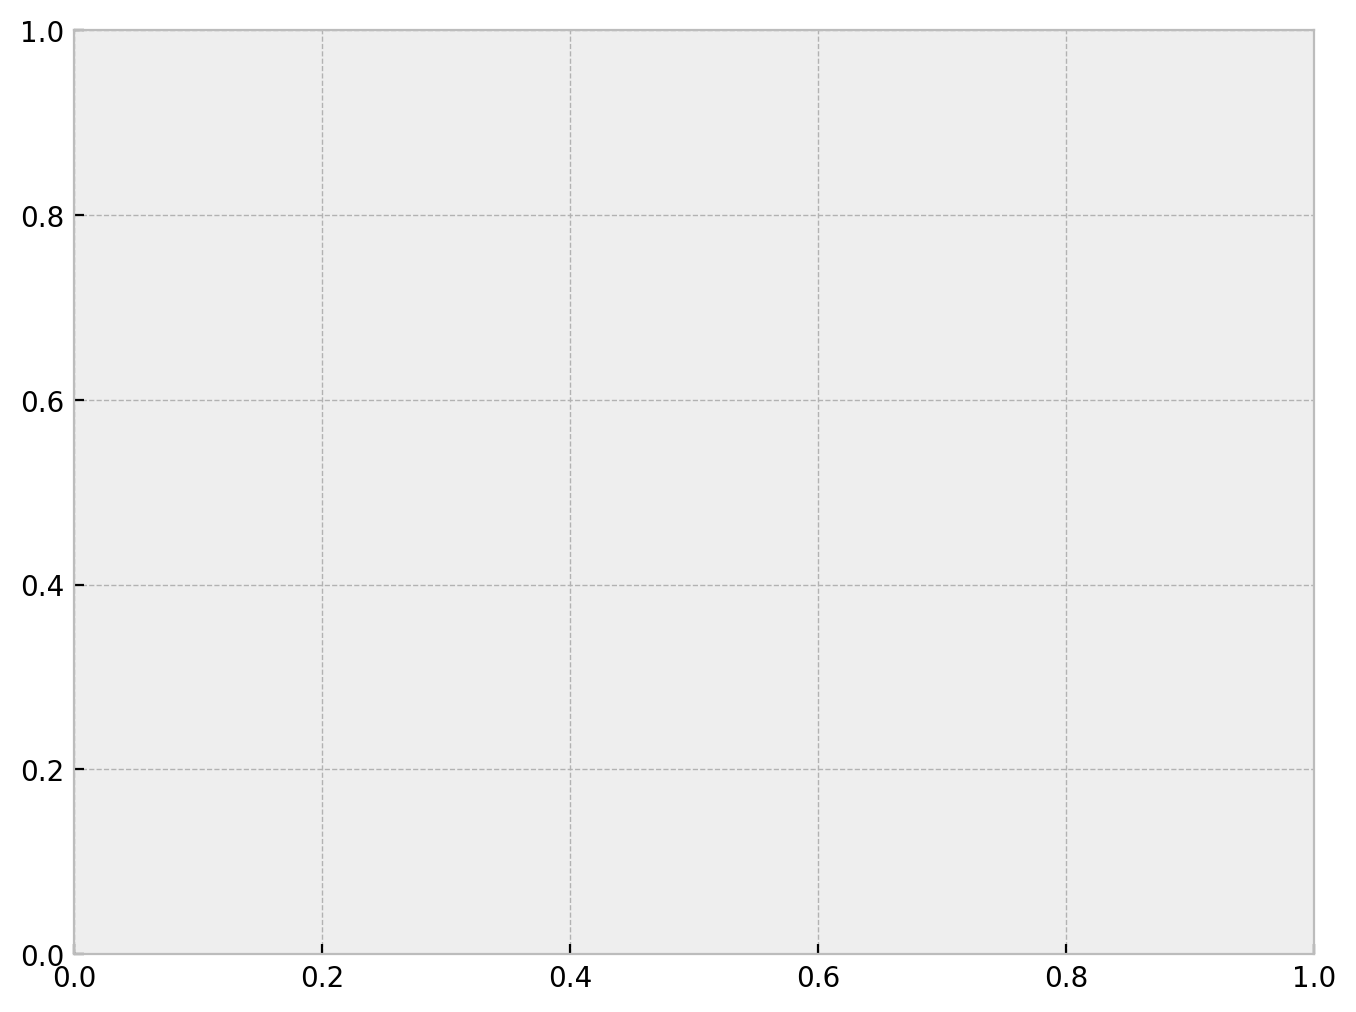

In [29]:
plt.plot(y_test, y_test_prediction, 'o')
plt.xlabel('True Disease Score')
plt.ylabel('Predicted Disease Score');

For plotting Matplotlib, you need to convert your PyTorch tensor back to a NumPy ndarray.

Before you can do this, you need to `detach` the tensor from the graph it uses to compute gradients.

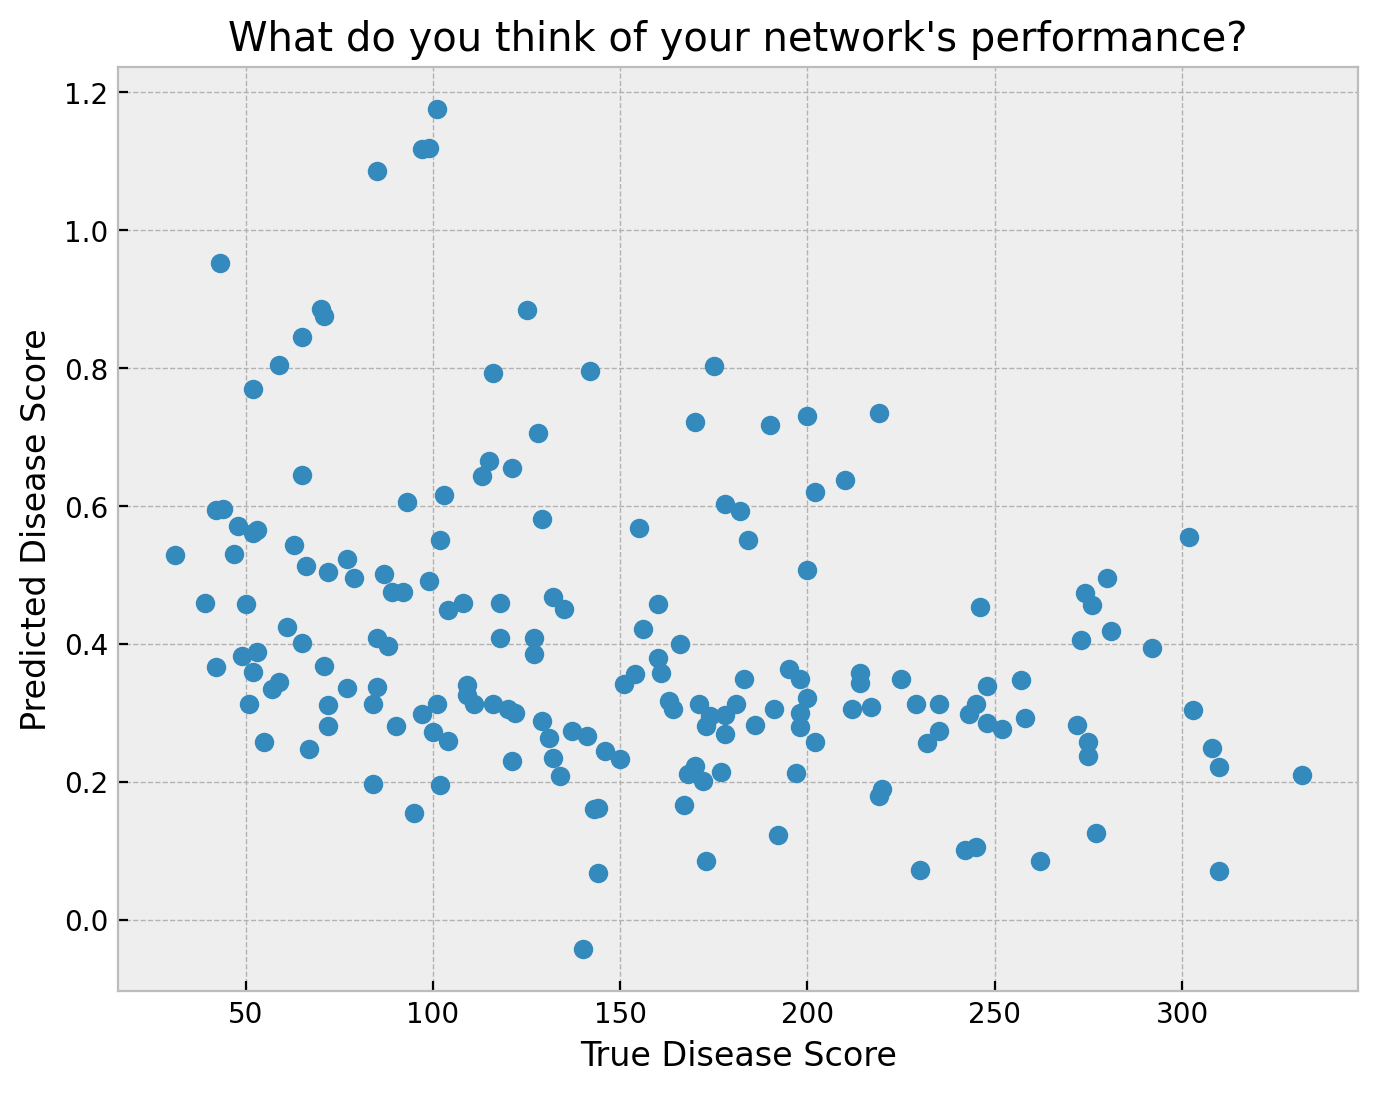

In [30]:
plt.plot(y_test, y_test_prediction.detach().numpy(), 'o')
plt.xlabel('True Disease Score')
plt.ylabel('Predicted Disease Score')
plt.title("What do you think of your network's performance?");

Of course you must train your network before it is of any use.

First, you need some *measure of the error (loss)*.

In [31]:
# mean squared error loss function
loss_fn = nn.MSELoss()

In [32]:
loss = loss_fn(y_test_prediction, y_test)
loss

tensor(27989.0020, grad_fn=<MseLossBackward0>)

Next, you need a *method for updating the model parameters based on the gradients of the loss with respect to each parameter*.

In [33]:
# stochastic gradient descent optimizer
# lr = learning rate
optimizer = torch.optim.SGD(net.parameters(), lr=1e-3)

Next, you need to define a function for training the model (i.e., on a training set).

In [34]:
def train(X, y, model, loss_fn, optimizer):
    # Put the model into training mode.
    model.train()

    # Compute prediction error
    pred = model(X)
    loss = loss_fn(pred, y)

    # Backpropagation
    # Compute gradient of loss and update model parameters to reduce loss
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # Return loss so we can keep track of it
    # .item() extracts float value from single-valued tensor
    return loss.item()

Next, you should also define a function for evaluating the model's performance (i.e., on a testing set).

In [35]:
def test(X, y, model, loss_fn):
    # Put the model into evaluation mode.
    model.eval()

    # Do NOT compute unecessary gradients during evaluation.
    with torch.no_grad():
        pred = model(X)
        loss = loss_fn(pred, y)

    # Return loss so we can keep track of it
    # .item() extracts float value from single-valued tensor
    return loss.item()

Now train the model for some number of iterations (epochs) and keep track of the training and testing loss along the way.

In [36]:
model = MyAwesomeNeuralNetwork()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [37]:
epochs = 5
train_loss = []
test_loss = []

for t in range(epochs):
    loss = train(X_train, y_train, model, loss_fn, optimizer)
    train_loss.append(loss)
    
    loss = test(X_test, y_test, model, loss_fn)
    test_loss.append(loss)

Visualize network training progress...

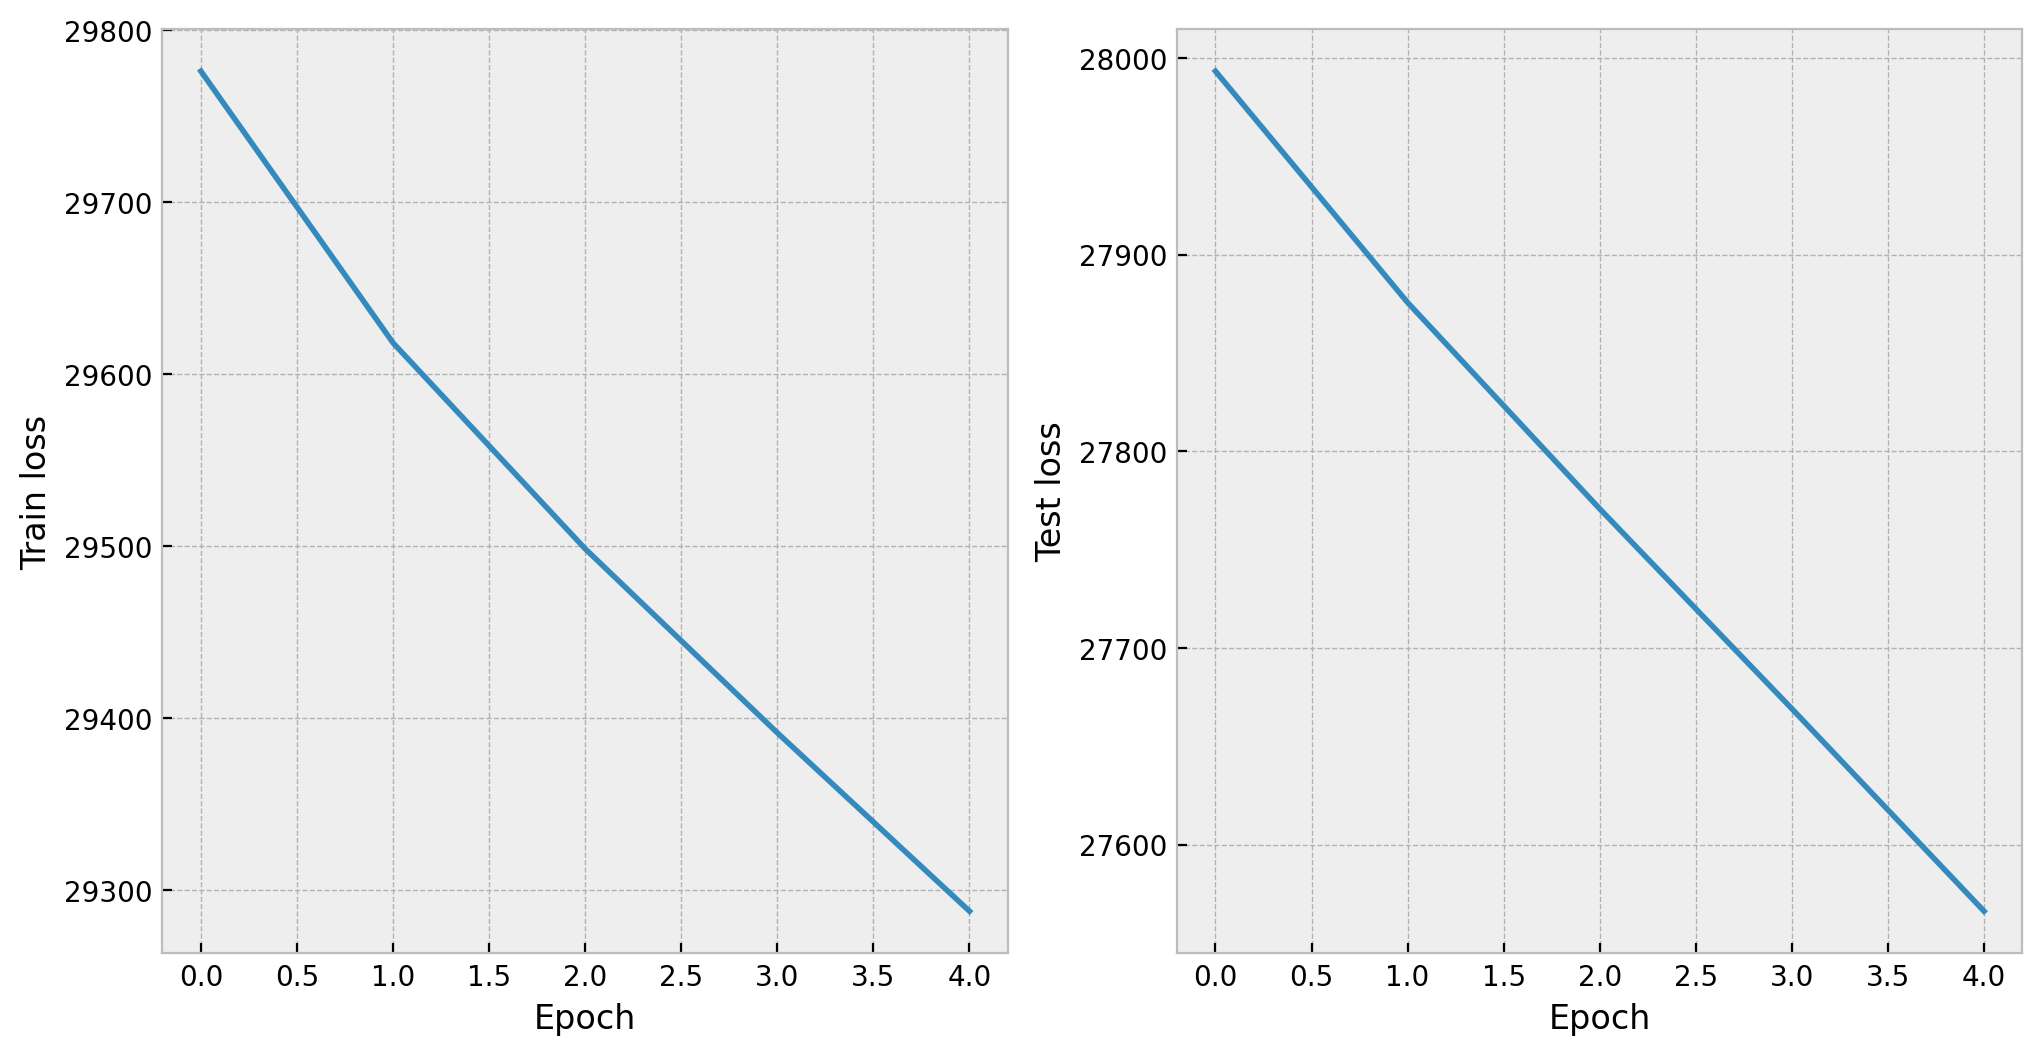

In [38]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Train loss')
plt.subplot(1, 2, 2)
plt.plot(test_loss)
plt.xlabel('Epoch')
plt.ylabel('Test loss');

Let's keep training starting from where we left off.

In [39]:
epochs = 95

for t in range(epochs):
    loss = train(X_train, y_train, model, loss_fn, optimizer)
    train_loss.append(loss)
    
    loss = test(X_test, y_test, model, loss_fn)
    test_loss.append(loss)

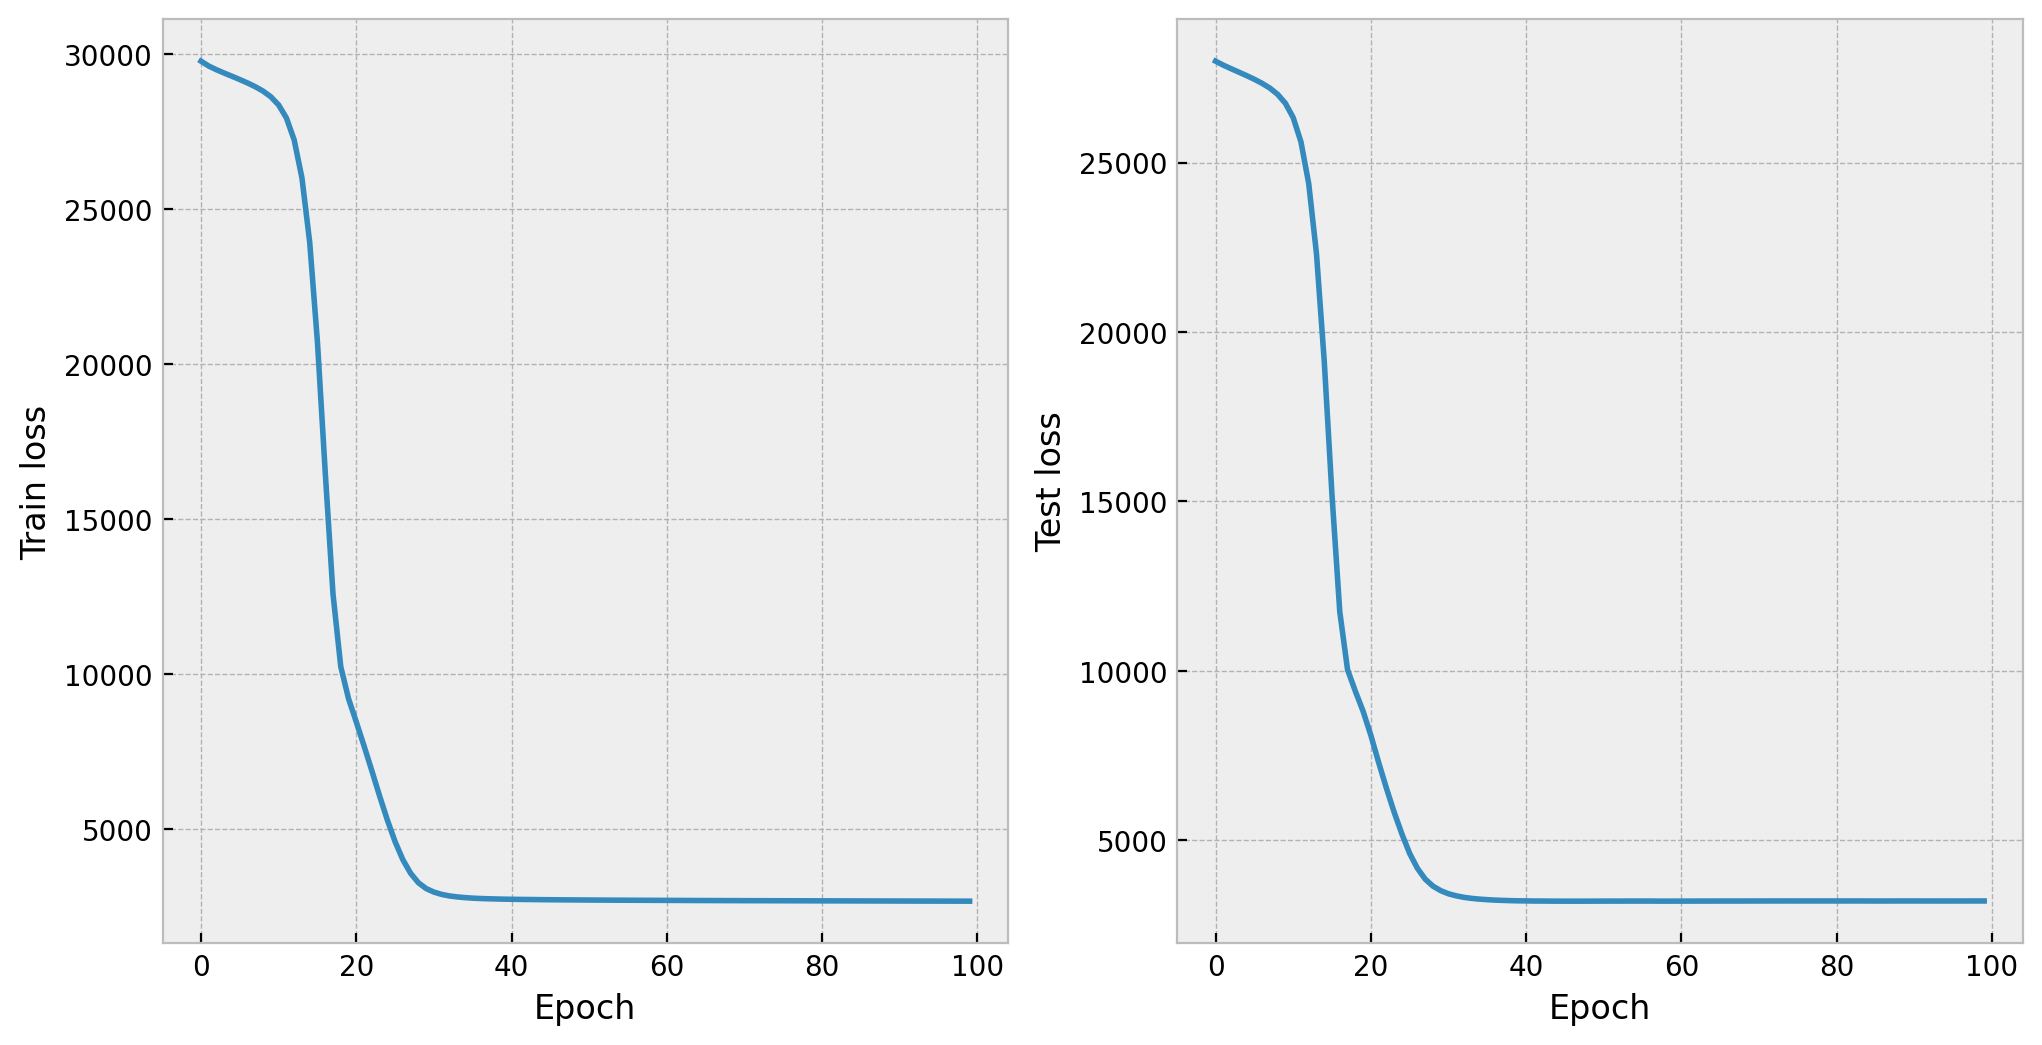

In [40]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Train loss')
plt.subplot(1, 2, 2)
plt.plot(test_loss)
plt.xlabel('Epoch')
plt.ylabel('Test loss');

Let's keep training starting from where we left off.

In [41]:
epochs = 100

for t in range(epochs):
    loss = train(X_train, y_train, model, loss_fn, optimizer)
    train_loss.append(loss)
    
    loss = test(X_test, y_test, model, loss_fn)
    test_loss.append(loss)

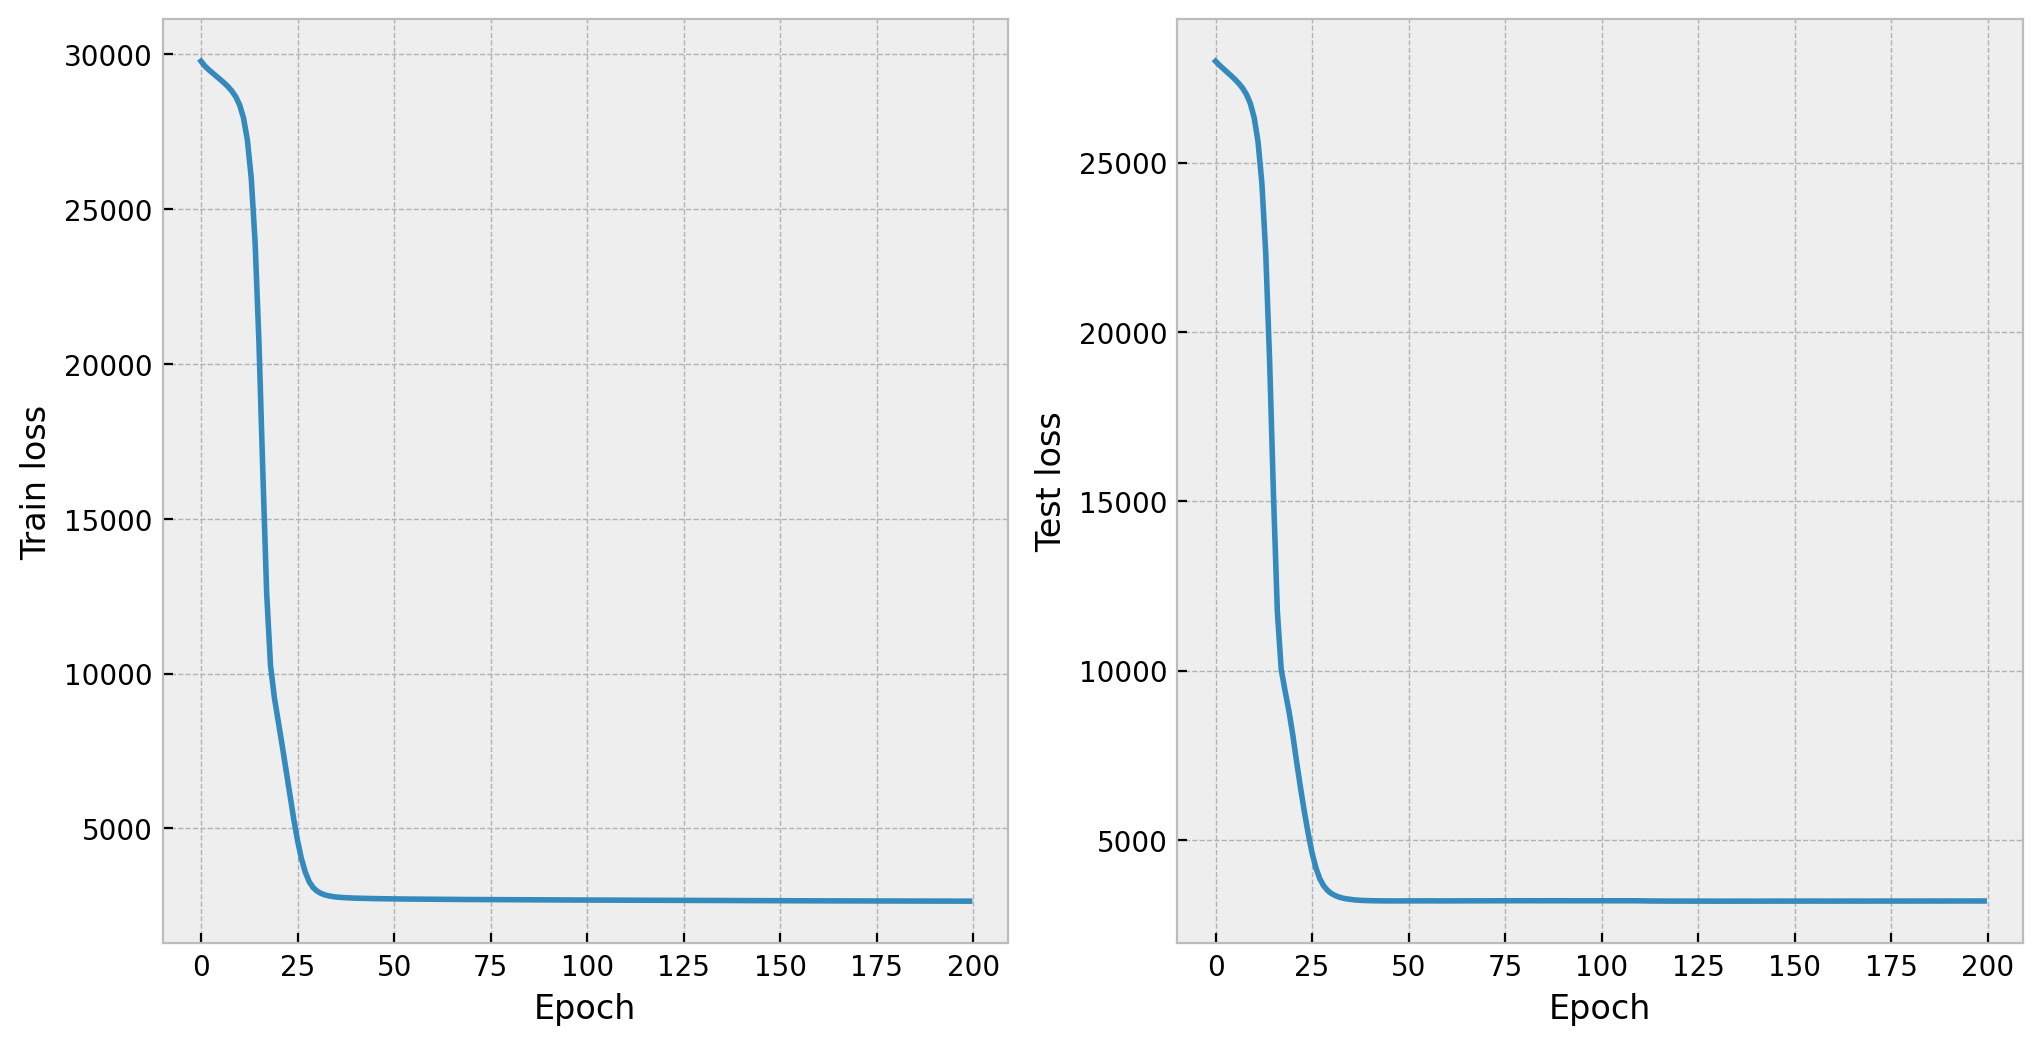

In [42]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Train loss')
plt.subplot(1, 2, 2)
plt.plot(test_loss)
plt.xlabel('Epoch')
plt.ylabel('Test loss');

Let's see how well your network is doing at predicting diabetes disease scores based on patient data.

In [43]:
y_test_prediction_before_training = y_test_prediction.clone()
y_test_prediction_after_training = model(X_test)

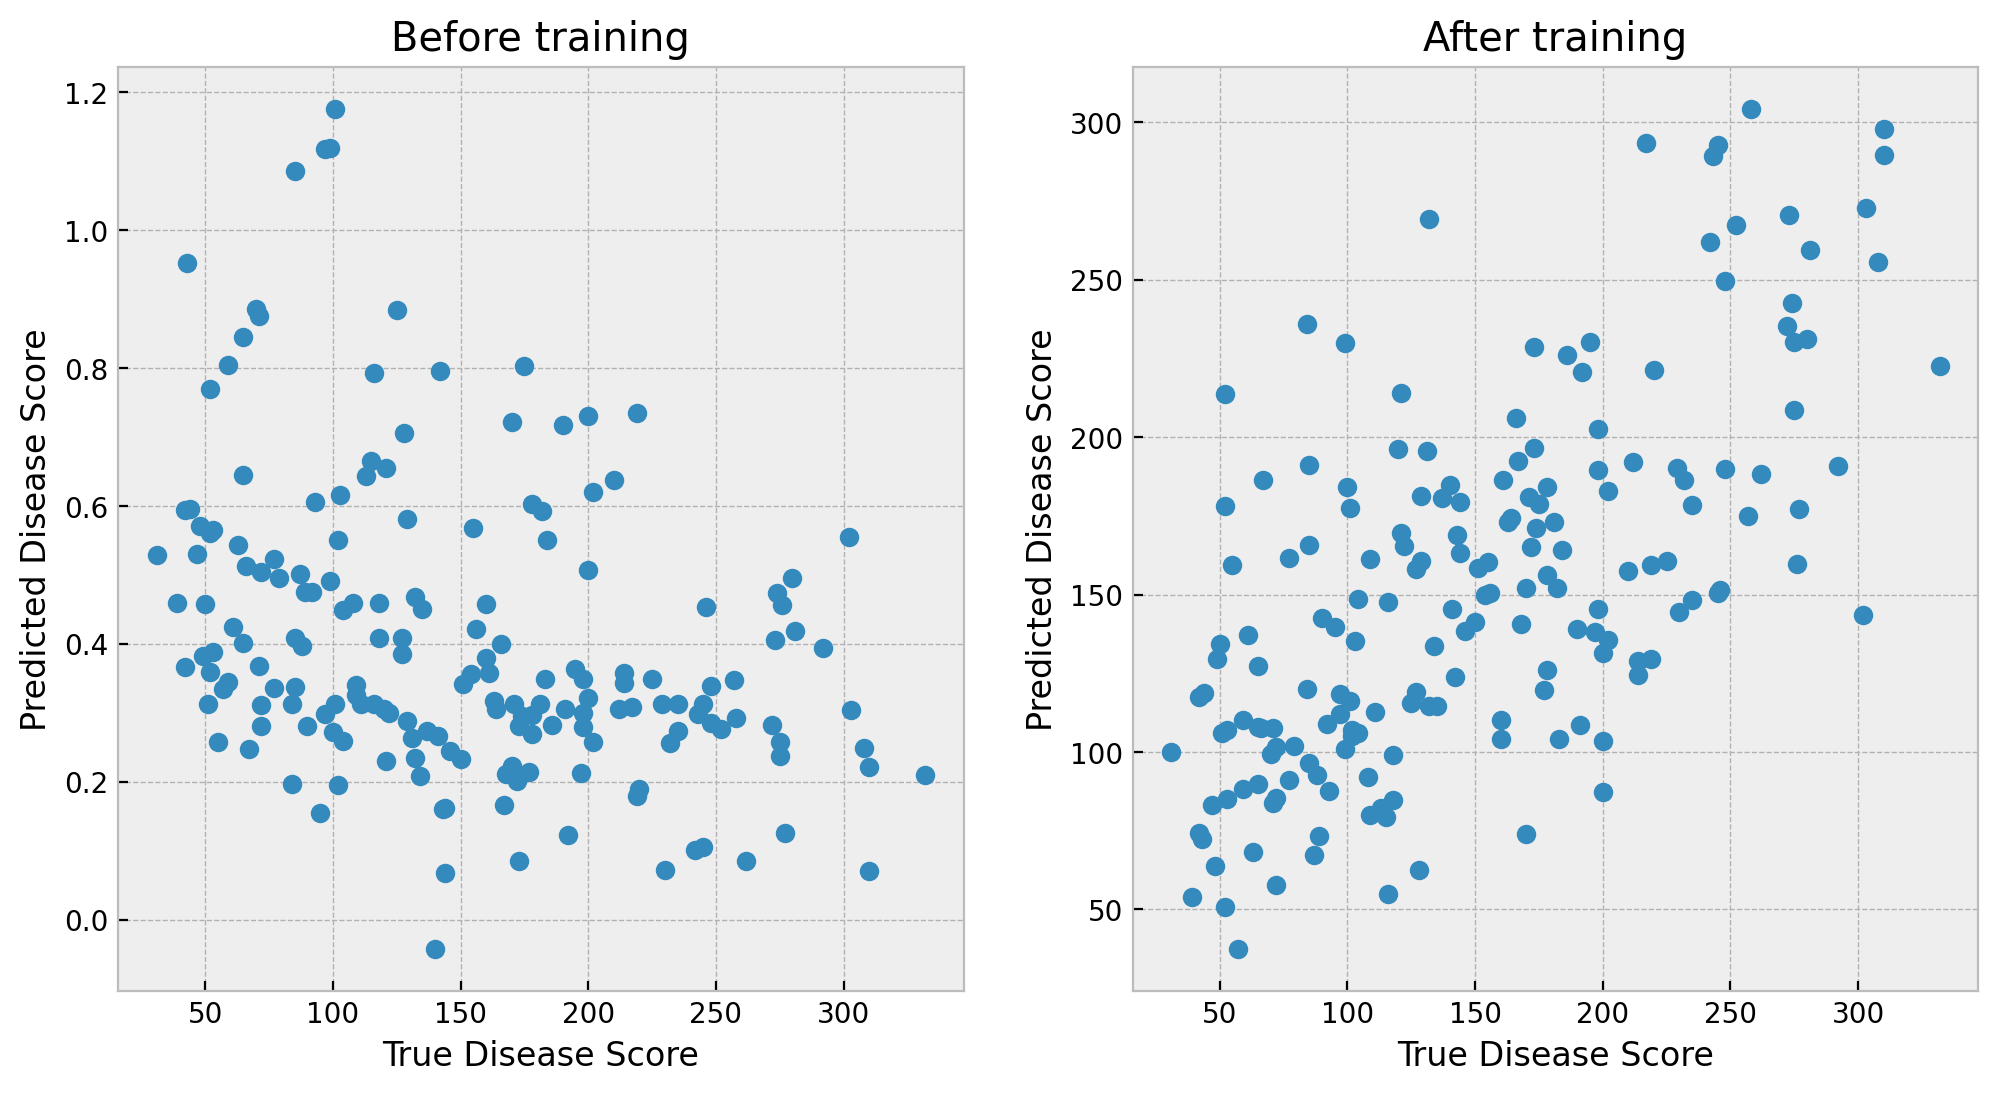

In [44]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(y_test, y_test_prediction_before_training.detach().numpy(), 'o')
plt.xlabel('True Disease Score')
plt.ylabel('Predicted Disease Score')
plt.title('Before training')
plt.subplot(1, 2, 2)
plt.plot(y_test, y_test_prediction_after_training.detach().numpy(), 'o')
plt.xlabel('True Disease Score')
plt.ylabel('Predicted Disease Score')
plt.title('After training');

Let's save your awesome network now that it's trained.

In [45]:
torch.save(model.state_dict(), "my-awesome-net.pth")

Let's create a new instance of `MyAwesomeNetwork` and load in the previously trained parameters.

In [46]:
net = MyAwesomeNeuralNetwork()

net.load_state_dict(torch.load("my-awesome-net.pth"))

<All keys matched successfully>

Visualize prediction for loaded model to verify it is all good.

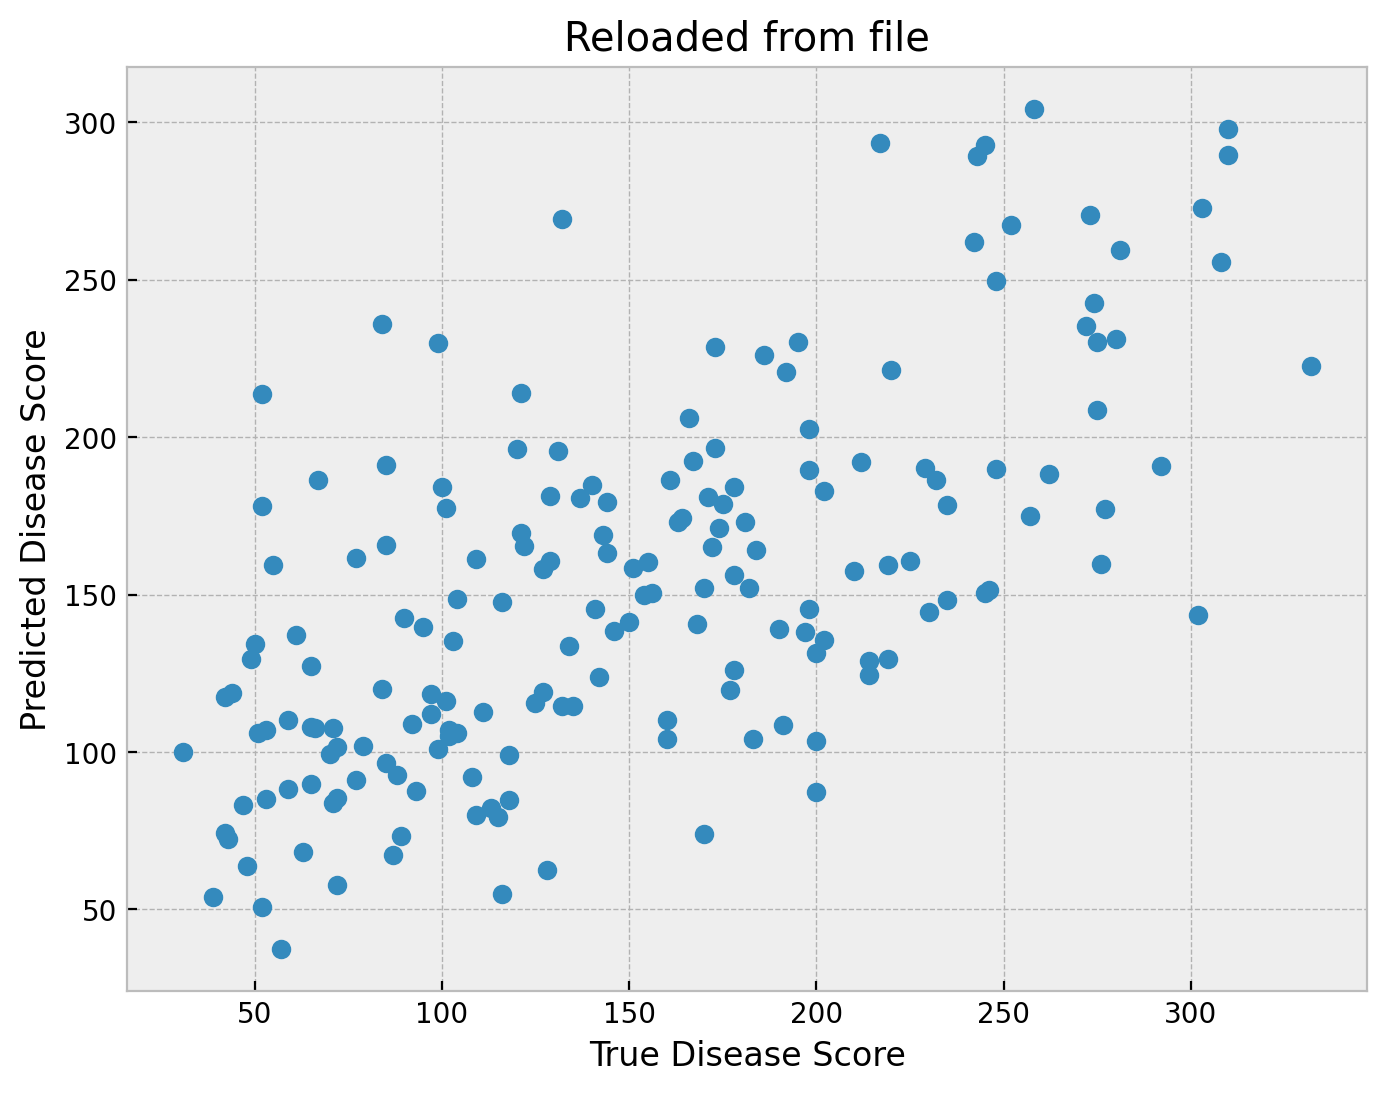

In [47]:
y_test_prediction = net(X_test)

plt.plot(y_test, y_test_prediction.detach().numpy(), 'o')
plt.xlabel('True Disease Score')
plt.ylabel('Predicted Disease Score')
plt.title('Reloaded from file');

### Exercise
I invite you to try training this same network using the dataset without standardization, and compare how well it does.

# Batches

**Often it is not possible to fit an entire dataset into working memory.**

Thus, it is typical that **datasets are split into batches** and that a *model is trained on each batch separately*.

PyTorch offers some convenient objects for working with datasets split into batches.

In [48]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

Let's slightly edit our training function to iterate over batches.

In [56]:
def train_loop(dataloader, model, loss_fn, optimizer):
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    
    num_batches = len(dataloader)
    train_loss = 0

    # Train on one batch at a time,
    # looping over all batches in the entire dataset
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    # Average train error over batches
    train_loss /= num_batches

    return train_loss

Let's slightly edit our evaluation function to iterate over batches.

In [57]:
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    
    num_batches = len(dataloader)
    test_loss = 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        # Test error per batch...
        for X, y in dataloader:
            pred = model(X)
            loss = loss_fn(pred, y)
            test_loss += loss.item()

    # Average test error over batches
    test_loss /= num_batches

    return test_loss

Now training your network is pretty much the same as before...

In [58]:
model = MyAwesomeNeuralNetwork()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [59]:
epochs = 200
train_loss = []
test_loss = []

for t in range(epochs):
    loss = train_loop(train_dataloader, model, loss_fn, optimizer)
    train_loss.append(loss)
    
    loss = test_loop(test_dataloader, model, loss_fn)
    test_loss.append(loss)

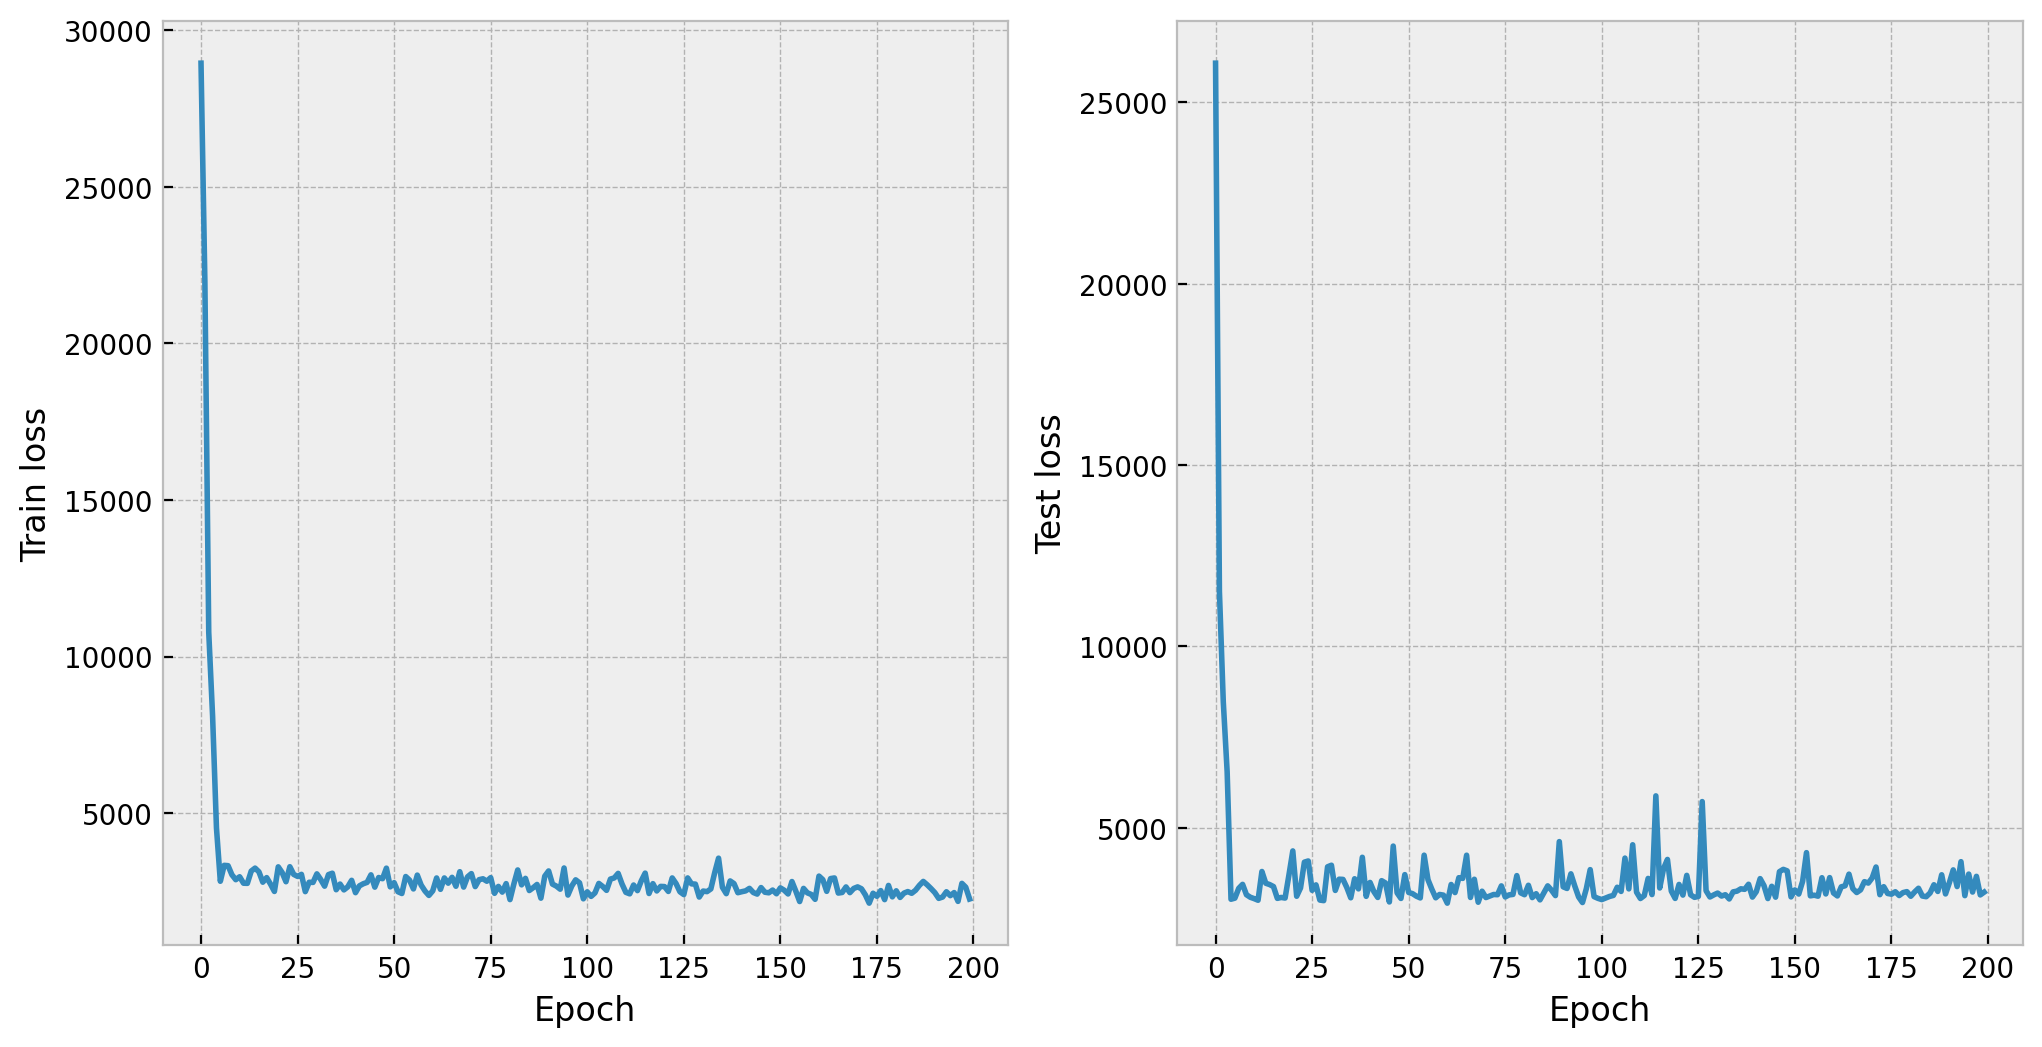

In [60]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Train loss')
plt.subplot(1, 2, 2)
plt.plot(test_loss)
plt.xlabel('Epoch')
plt.ylabel('Test loss');

Visualize model prediction.

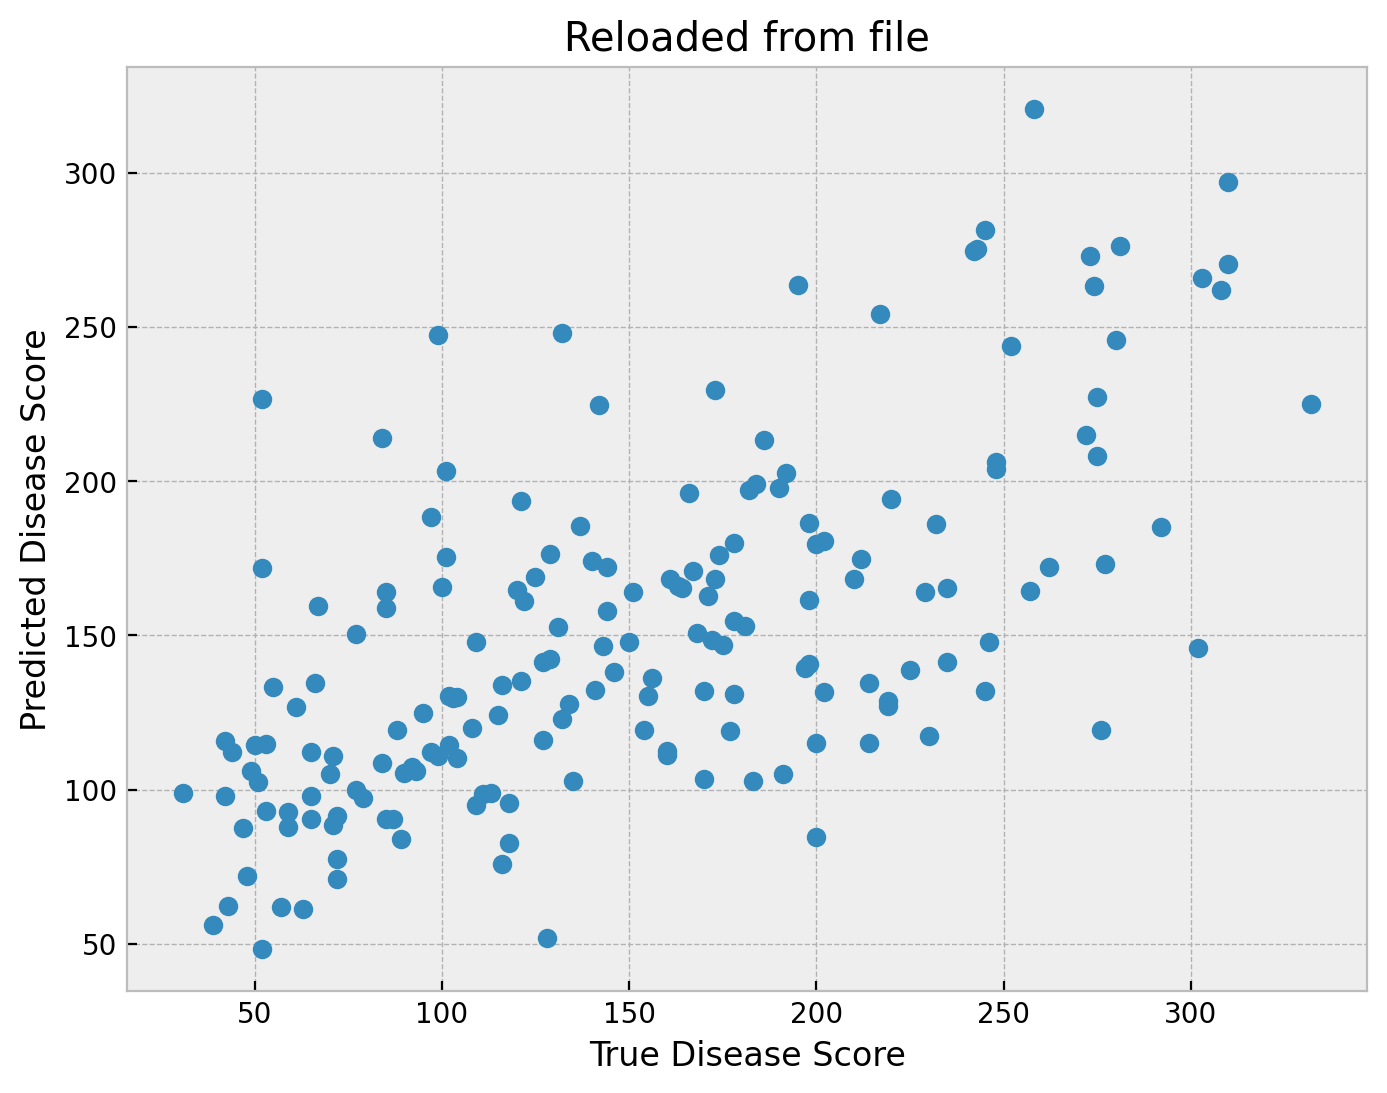

In [61]:
y_test_prediction = model(X_test)

plt.plot(y_test, y_test_prediction.detach().numpy(), 'o')
plt.xlabel('True Disease Score')
plt.ylabel('Predicted Disease Score')
plt.title('Reloaded from file');

# GPU vs. CPU

A major advantage of PyTorch's tensor over NumPy's ndarray is that it is built to work with GPUs.

All of *your data and your model can either live on the CPU or on the GPU*, and you can move them back and forth.

However, **a model on the GPU doesn't know about data on the CPU, and vice-versa**. So you have to make sure both your model and your data are moved to the same device before you attempt any computations.

You can query what options are available to you on your current machine.

In [62]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda" if torch.cuda.is_available()
    else "mps" if torch.backends.mps.is_available()
    else "cpu"
)
device

'mps'

Let's slightly edit your training function to move batch data to your selected device.

In [63]:
def train_loop(dataloader, model, loss_fn, optimizer):
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    
    num_batches = len(dataloader)
    train_loss = 0

    # Train on one batch at a time,
    # looping over all batches in the entire dataset
    for batch, (X, y) in enumerate(dataloader):
        # Move data to device
        X, y = X.to(device), y.to(device)
        
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    # Average train error over batches
    train_loss /= num_batches

    return train_loss

Let's slightly edit your evaluation function to move batch data to your selected device.

In [64]:
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    
    num_batches = len(dataloader)
    test_loss = 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        # Test error per batch...
        for X, y in dataloader:
            # Move data to device
            X, y = X.to(device), y.to(device)
            
            # Compute prediction and loss
            pred = model(X)
            loss = loss_fn(pred, y)
            test_loss += loss.item()

    # Average test error over batches
    test_loss /= num_batches

    return test_loss

Now training your network is pretty much the same as before except you need to rememeber to also move your model to your selected device.

In [65]:
model = MyAwesomeNeuralNetwork().to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [66]:
epochs = 200
train_loss = []
test_loss = []

for t in range(epochs):
    loss = train_loop(train_dataloader, model, loss_fn, optimizer)
    train_loss.append(loss)
    
    loss = test_loop(test_dataloader, model, loss_fn)
    test_loss.append(loss)

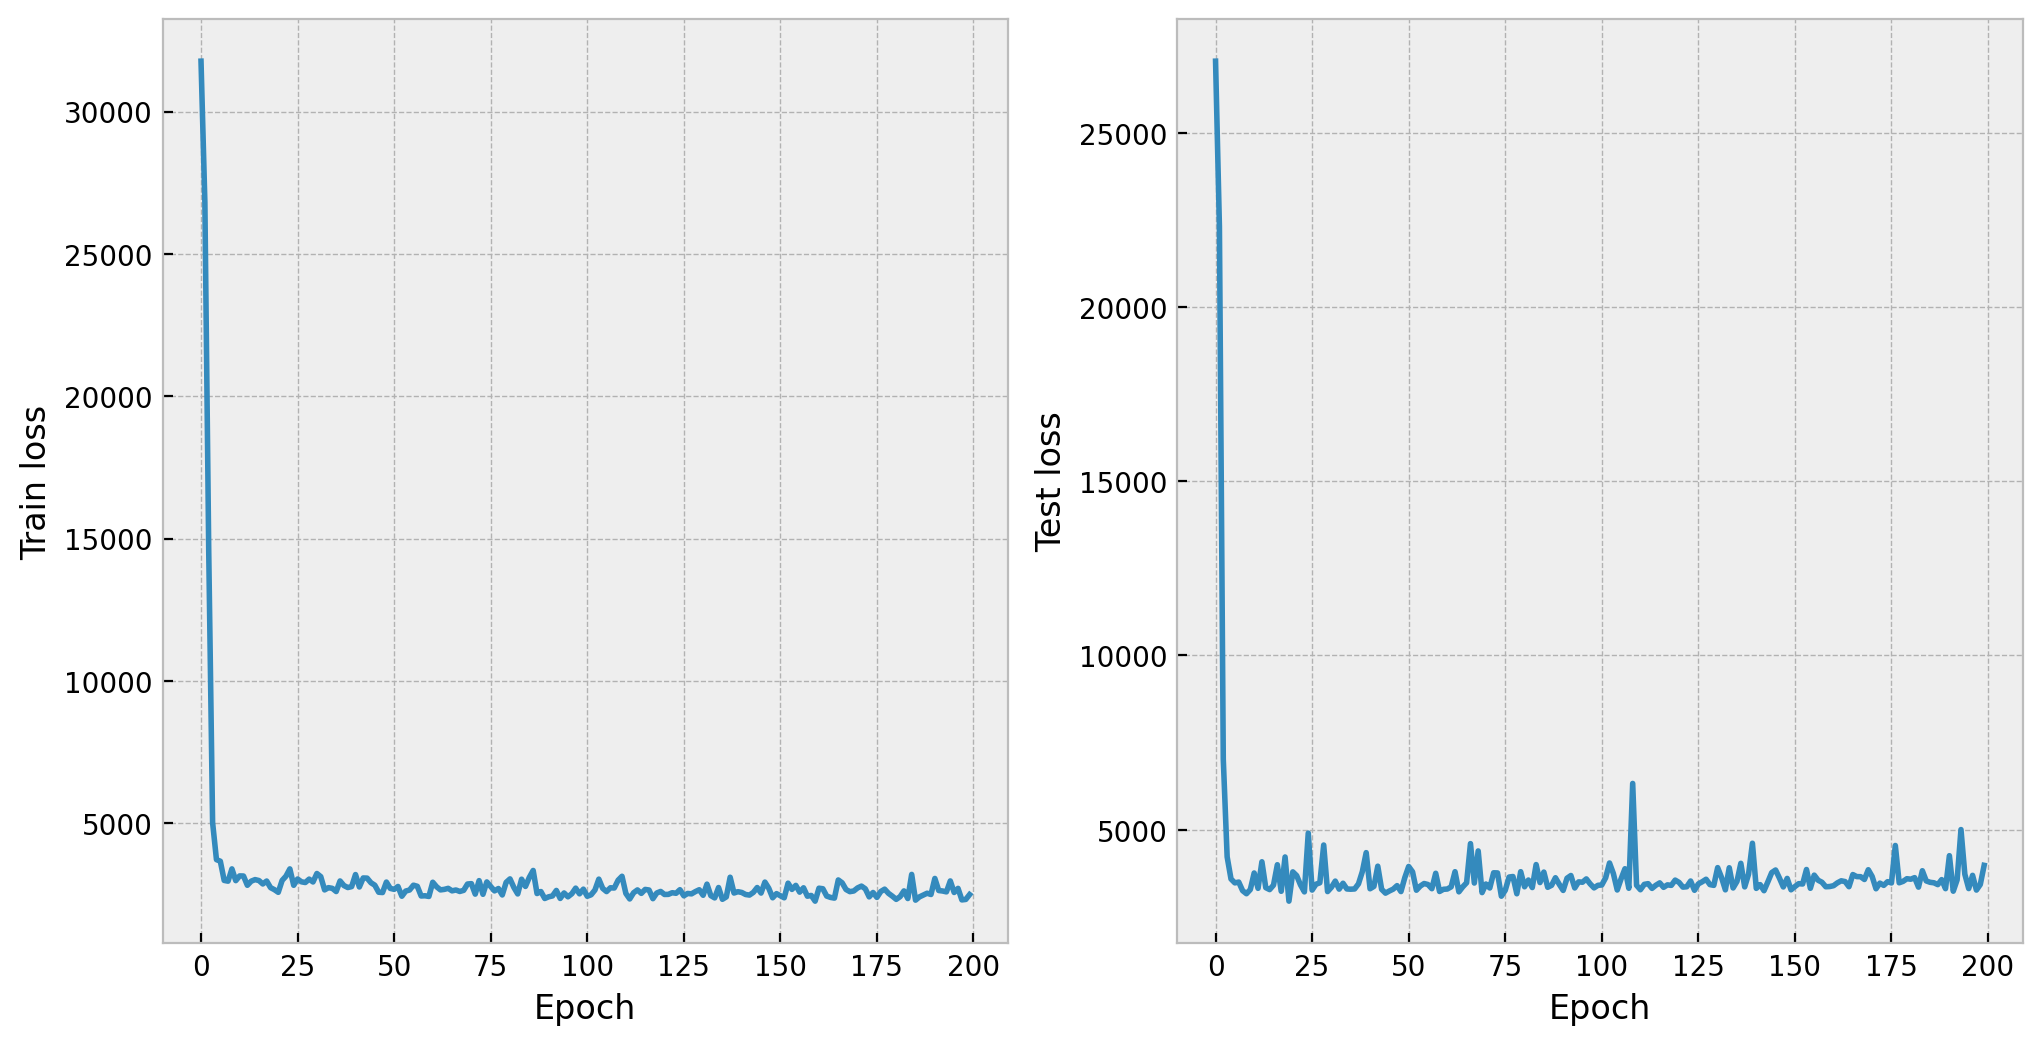

In [67]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Train loss')
plt.subplot(1, 2, 2)
plt.plot(test_loss)
plt.xlabel('Epoch')
plt.ylabel('Test loss');

To get the model prediction, make sure both the model and the data are on the same device.

In [73]:
y_test_prediction = model(X_test)

RuntimeError: Placeholder storage has not been allocated on MPS device!

To get the model prediction, make sure both the model and the data are on the same device.

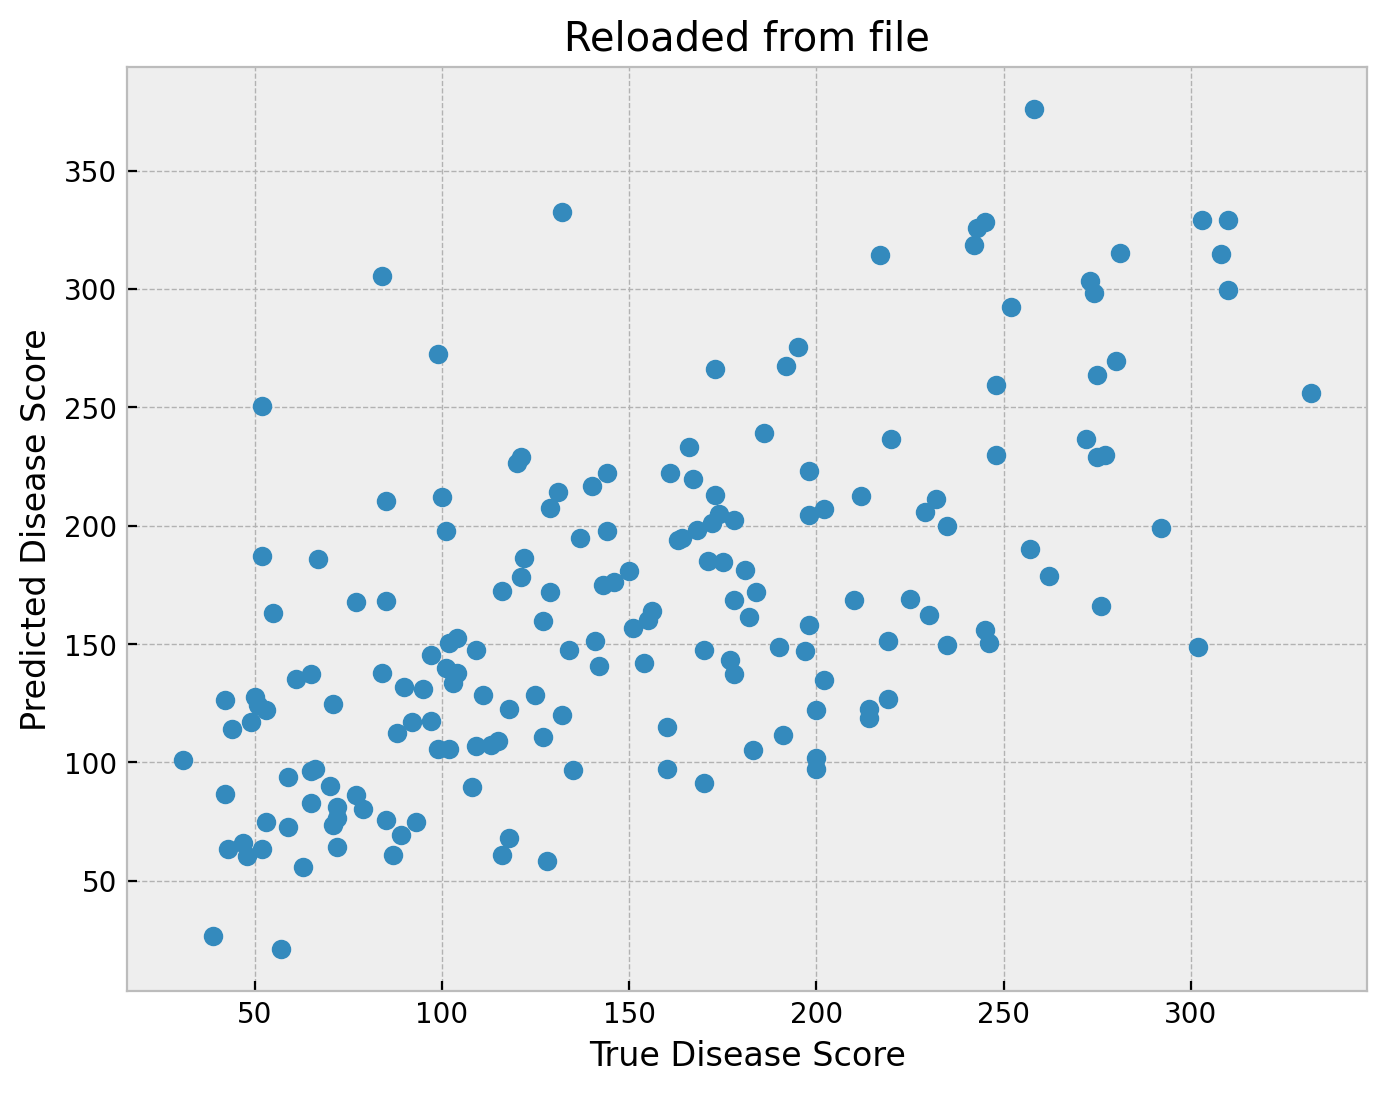

In [72]:
y_test_prediction_on_device = model(X_test.to(device))

y_test_prediction_on_cpu = y_test_prediction_on_device.cpu()

y_test_prediction_numpy = y_test_prediction_on_cpu.detach().numpy()

plt.plot(y_test, y_test_prediction_numpy, 'o')
plt.xlabel('True Disease Score')
plt.ylabel('Predicted Disease Score')
plt.title('Reloaded from file');